## 向量
    向量在julia用一维数组对象, 内部元素可以用逗号或者分号进行分割，外部被中括号所包围

In [1]:
x = [-1.1, 0, 3.6, 7.2]

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
  7.2

In [2]:
length(x)

4

In [3]:
y = [1; 2; 3; 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

**注意以下情况，他们所表示的并不是向量**

In [4]:
a = [1 2] # 这是一个1*2纬的数组

1×2 Array{Int64,2}:
 1  2

In [5]:
b = (1, 2) # 这是一个元组对象

(1, 2)

### 索引 
$x_i$ 对应的表达式 是 $x[i]$ 这里$i$是从1到$n$的

In [6]:
x[1]

-1.1

In [7]:
x[1] = 2 # 修改元素的值

2

In [8]:
x

4-element Array{Float64,1}:
 2.0
 0.0
 3.6
 7.2

In [9]:
x[end] # 表示最后一个元素 == x[length(x)]

7.2

In [10]:
y = x # y 是x的引用 指向同一块内存

4-element Array{Float64,1}:
 2.0
 0.0
 3.6
 7.2

In [11]:
x == y

true

In [12]:
y[3] = 1

1

In [13]:
x

4-element Array{Float64,1}:
 2.0
 0.0
 1.0
 7.2

In [14]:
z = copy(x)

4-element Array{Float64,1}:
 2.0
 0.0
 1.0
 7.2

In [16]:
s_x = repr(UInt64(pointer_from_objref(x)))

"0x0000000112f8c550"

In [18]:
s_y = repr(UInt64(pointer_from_objref(x))) # x, y 指向同一块内存

"0x0000000112f8c550"

In [19]:
s_z = repr(UInt64(pointer_from_objref(z))) # z 指向另一块内存

"0x00000001138e6e70"

### 判断是否相等 ==

In [20]:
x == y

true

In [21]:
y == z

true

In [27]:
z[1] = 3

3

In [28]:
z

4-element Array{Float64,1}:
 3.0
 0.0
 1.0
 7.2

In [29]:
y == z

false

In [30]:
y

4-element Array{Float64,1}:
 2.0
 0.0
 1.0
 7.2

### 标量， 单元素的向量

In [31]:
x = [1.3]

1-element Array{Float64,1}:
 1.3

In [32]:
y = 1.3

1.3

In [33]:
x == y

false

In [34]:
x[1] == y

true

### 分块 堆叠向量
julia中用分号或者vcat方法进行垂直连接

$z=(x, y) 其中 x=(1, -2), y=(1, 1, 0)$

In [55]:
x = [1, -2]

2-element Array{Int64,1}:
  1
 -2

In [56]:
y = [1, 1, 0]

3-element Array{Int64,1}:
 1
 1
 0

In [57]:
z = [x; y]

5-element Array{Int64,1}:
  1
 -2
  1
  1
  0

In [58]:
z = vcat(x, y)

5-element Array{Int64,1}:
  1
 -2
  1
  1
  0

In [59]:
[1; x; 0] # 也可以使用标量

4-element Array{Int64,1}:
  1
  1
 -2
  0

In [60]:
[1, x] #注意对象的变化

2-element Array{Any,1}:
 1       
  [1, -2]

In [61]:
x

2-element Array{Int64,1}:
  1
 -2

In [77]:
size(x) # 查看纬度

(2,)

In [64]:
x

2-element Array{Int64,1}:
  1
 -2

In [65]:
d = [2, 3]

2-element Array{Int64,1}:
 2
 3

In [66]:
f = [x d]

2×2 Array{Int64,2}:
  1  2
 -2  3

In [67]:
size(f)

(2, 2)

## 单位向量的构建

In [68]:
unit_vector(i, n) = [zeros(i-1); 1; zeros(n-i)]

unit_vector (generic function with 1 method)

In [69]:
unit_vector(2, 4)

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

# 画图

In [70]:
using Plots

┌ Info: Recompiling stale cache file /Users/mac/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [71]:
temps = rand(-30:40, 30, 1)

30×1 Array{Int64,2}:
 -22
  30
 -16
  40
 -27
 -19
  32
  20
 -10
  10
  30
  -7
  15
   ⋮
 -23
   5
 -23
  -3
  36
   7
   0
   9
   4
  29
   0
  10

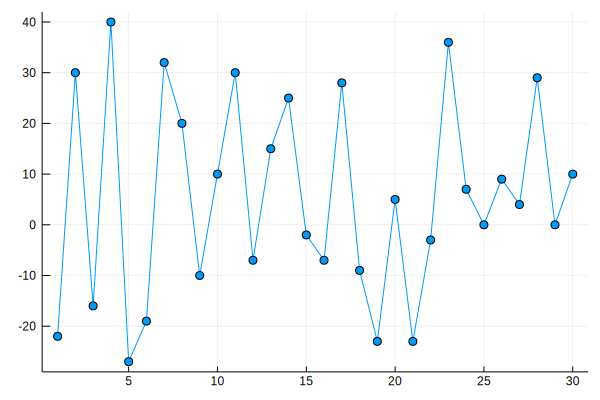

In [73]:
plot(temps, marker=:circle, legend=false, grid=true)

In [74]:
savefig("temperature.pdf")

## 运算

In [78]:
x

2-element Array{Int64,1}:
  1
 -2

In [79]:
x / 3

2-element Array{Float64,1}:
  0.3333333333333333
 -0.6666666666666666

In [81]:
x .- 1

2-element Array{Int64,1}:
  0
 -3

In [82]:
p_init = [i for i in 1:10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [83]:
p_final = [i + rand(1:4) for i in 1:10]

10-element Array{Int64,1}:
  5
  6
  5
  7
  9
  8
 11
 12
 12
 14

In [88]:
r = ((p_final - p_init) ./ p_init) .* 100 # 增长率

10-element Array{Float64,1}:
 400.0             
 200.0             
  66.66666666666666
  75.0             
  80.0             
  33.33333333333333
  57.14285714285714
  50.0             
  33.33333333333333
  40.0             

In [89]:
w = [1, 2, 2]; z=[1, 2, 4]

3-element Array{Int64,1}:
 1
 2
 4

In [90]:
w == z

false

In [91]:
w .== z

3-element BitArray{1}:
  true
  true
 false

In [92]:
w

3-element Array{Int64,1}:
 1
 2
 2

In [93]:
x

2-element Array{Int64,1}:
  1
 -2

In [95]:
x[abs.(x) .> 1]

1-element Array{Int64,1}:
 -2

## 线性组合

In [97]:
a = [1, 2]; b = [3, 4];
α = -0.5; β = 1.5;

In [98]:
c = α * a + β * b

2-element Array{Float64,1}:
 4.0
 5.0

In [99]:
lincomb(coeff, vectors) = sum(coeff[i] * vectors[i] for i = 1:length(vectors))

lincomb (generic function with 1 method)

In [100]:
lincomb((-0.5, 1.5), ([1, 2], [3, 4]))

2-element Array{Float64,1}:
 4.0
 5.0

# 内积

其实定义了两个向量的欧式长度和夹角的cos的乘积
$X^{T}Y=|X||Y|cos(\theta)$
    

In [101]:
x = [-1, 2, 2]

3-element Array{Int64,1}:
 -1
  2
  2

In [102]:
y = [1, 0, 4]

3-element Array{Int64,1}:
 1
 0
 4

In [108]:
x' * y

7